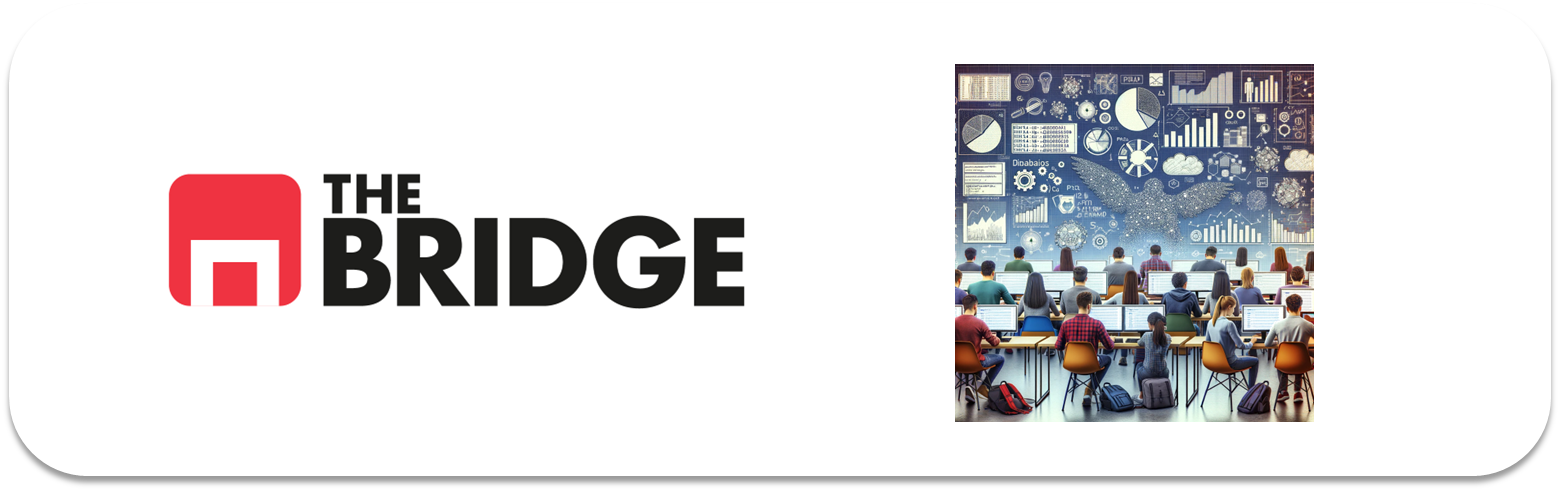

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [17]:
# Importamos bibliotecas que usaremos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#from bootcampviztools import plot_combined_graphs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge


In [24]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [9]:
# Cargamos el dataset
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv")
df.head()


,CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV
0,0.00632|18.0|2.31|0.0|0.538|6.575|65.2|4.09|1....
1,0.02731|0.0|7.07|0.0|0.469|6.421|78.9|4.9671|2...
2,0.02729|0.0|7.07|0.0|0.469|7.185|61.1|4.9671|2...
3,0.03237|0.0|2.18|0.0|0.458|6.998|45.8|6.0622|3...
4,0.06905|0.0|2.18|0.0|0.458|7.147|54.2|6.0622|3...


In [10]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter='|')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


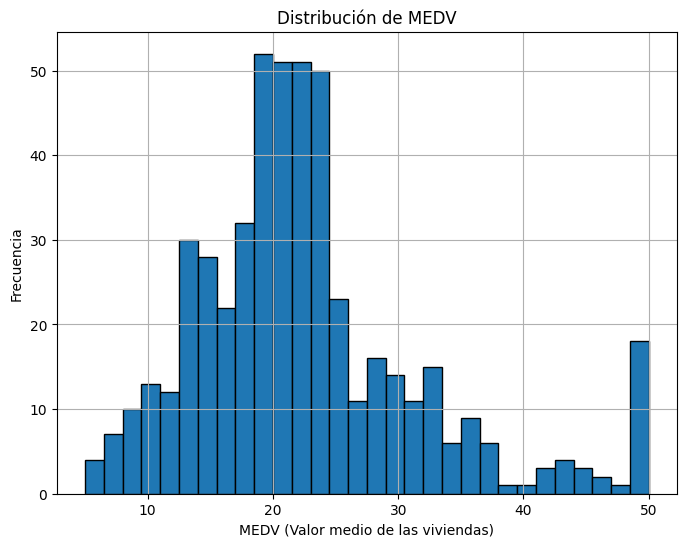

In [13]:
# Crear un histograma de la variable objetivo "MEDV"
plt.figure(figsize=(8, 6))
plt.hist(df['MEDV'], bins=30, edgecolor='black')
plt.title('Distribución de MEDV')
plt.xlabel('MEDV (Valor medio de las viviendas)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


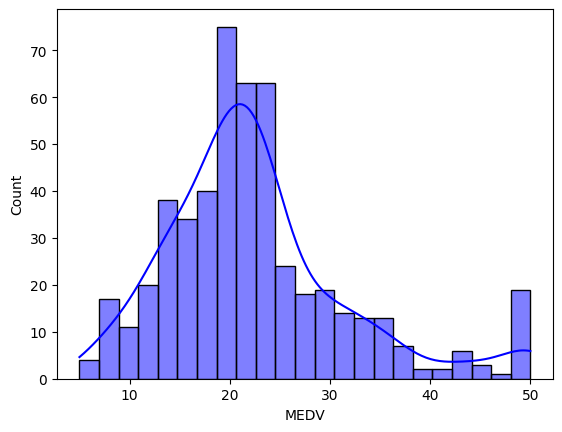

In [19]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

In [20]:
df.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


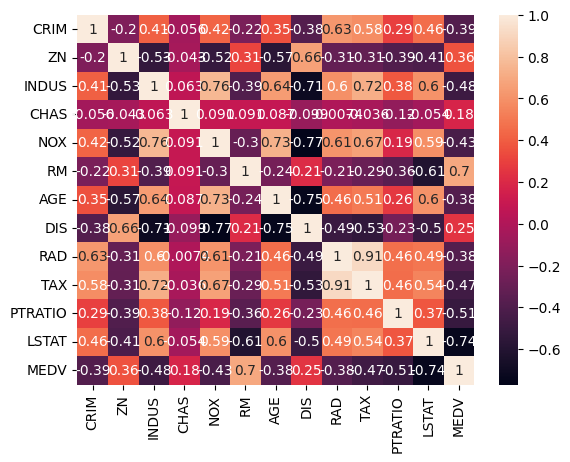

In [21]:
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

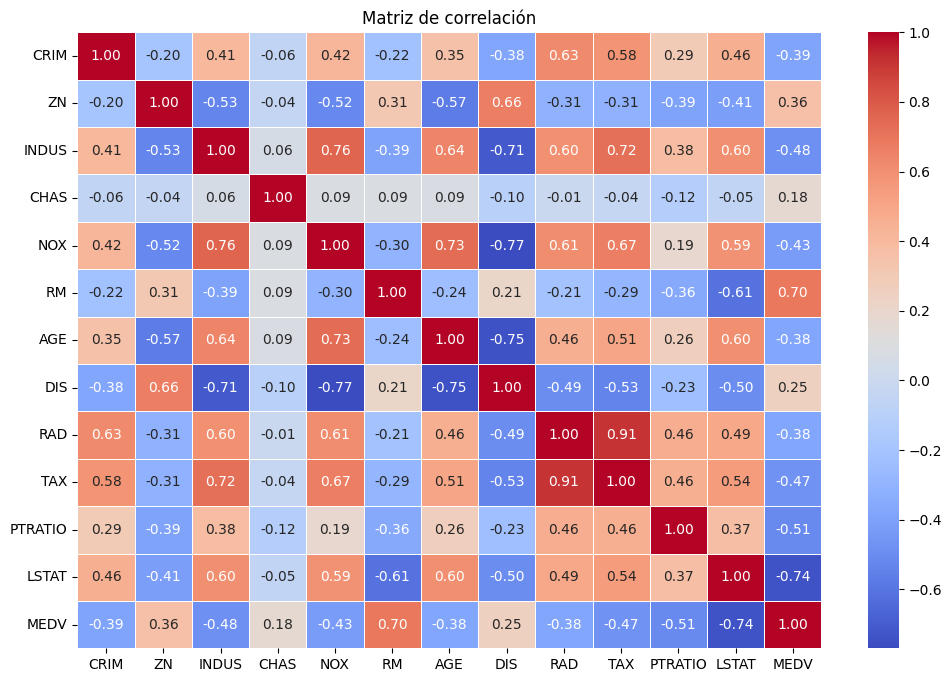

In [22]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de correlación')
plt.show()



En el mapa de calor, los valores más claros representan correlaciones más fuertes (positivas o negativas), mientras que los valores más oscuros representan correlaciones más débiles o cercanas a cero.

Parece que la variable "RM" (número promedio de habitaciones por vivienda) tiene una correlación positiva fuerte con "MEDV" (valor medio de las viviendas ocupadas por sus propietarios), mientras que la variable "LSTAT" (% de población de estatus socioeconómico bajo) tiene una correlación negativa fuerte con "MEDV".

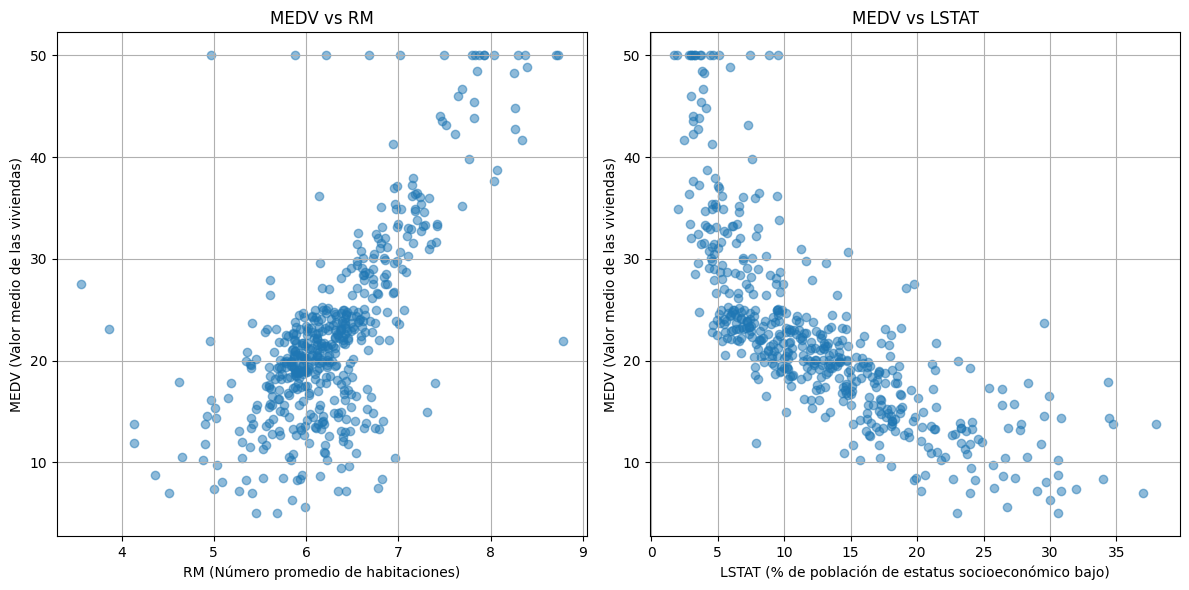

In [14]:
# Crear un diagrama de dispersión de MEDV vs RM y MEDV vs LSTAT
plt.figure(figsize=(12, 6))

# Diagrama de dispersión de MEDV vs RM
plt.subplot(1, 2, 1)
plt.scatter(df['RM'], df['MEDV'], alpha=0.5)
plt.title('MEDV vs RM')
plt.xlabel('RM (Número promedio de habitaciones)')
plt.ylabel('MEDV (Valor medio de las viviendas)')
plt.grid(True)

# Diagrama de dispersión de MEDV vs LSTAT
plt.subplot(1, 2, 2)
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT (% de población de estatus socioeconómico bajo)')
plt.ylabel('MEDV (Valor medio de las viviendas)')
plt.grid(True)

plt.tight_layout()
plt.show()


3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test

In [25]:
# Seleccionar características y variable objetivo
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Crear el modelo de regresión lineal
model = linear_model.LinearRegression()

# Entrenar el modelo con los datos de entrenamiento normalizados
model.fit(X_train_scaled, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test_scaled)


In [27]:
# Obtener los coeficientes (pesos) del modelo
weights = model.coef_

# Calcular la importancia relativa de las características
feature_importance = weights / np.linalg.norm(weights)

# Crear un DataFrame para visualizar los pesos y la importancia de las características
feature_df = pd.DataFrame({'Feature': ['RM', 'LSTAT'], 'Weight': weights, 'Importance': feature_importance})

# Imprimir el DataFrame
print(feature_df)


  Feature     Weight  Importance
0      RM  26.871891    0.760812
1   LSTAT -22.921748   -0.648973


Los resultados muestran los pesos (coeficientes) del modelo de regresión lineal para las características "RM" (número promedio de habitaciones) y "LSTAT" (% de población de estatus socioeconómico bajo), así como la importancia relativa de estas características.

Para la característica "RM", el peso es positivo (26.87), lo que indica que un aumento en el número promedio de habitaciones por vivienda está asociado con un aumento en el valor medio de las viviendas (MEDV). La importancia relativa de "RM" es alta (0.76), lo que sugiere que es una característica significativa para predecir el valor medio de las viviendas.
Para la característica "LSTAT", el peso es negativo (-22.92), lo que indica que un aumento en el porcentaje de población de estatus socioeconómico bajo está asociado con una disminución en el valor medio de las viviendas (MEDV). La importancia relativa de "LSTAT" es también alta (-0.65), lo que sugiere que es una característica importante para predecir el valor medio de las viviendas.
Estos resultados son consistentes con nuestras observaciones anteriores, donde vimos que "RM" tenía una relación positiva con "MEDV" y "LSTAT" tenía una relación negativa. Esto confirma que estas características son relevantes y significativas para nuestro modelo de regresión lineal.

MAE: 3.89875972138236
MSE: 31.243290601783627
RMSE: 5.589569804715174
R2 Score: 0.5739577415025858


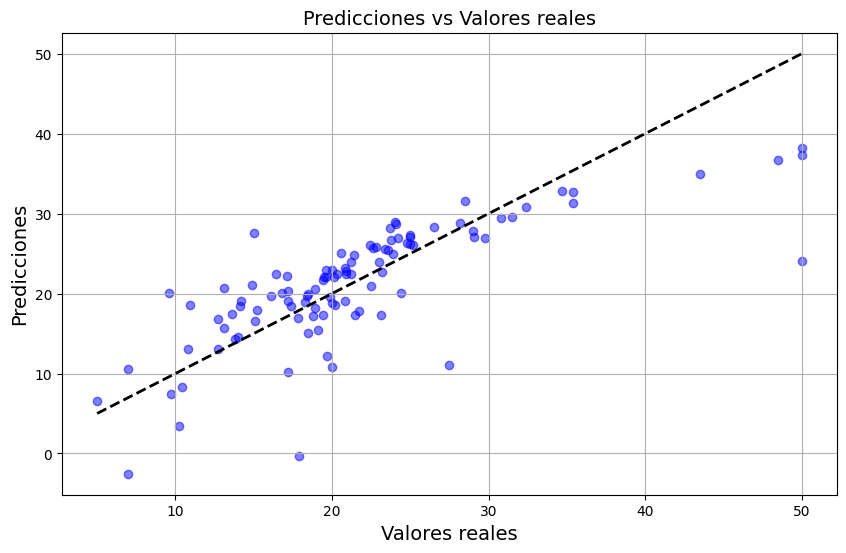

In [28]:
# Calcular métricas de evaluación
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Imprimir las métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Graficar las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicciones vs Valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()


El error absoluto medio (MAE) es aproximadamente 3.90. Esto significa que, en promedio, nuestras predicciones tienen un error absoluto de alrededor de $3.90 mil dólares en comparación con los valores reales.
El error cuadrático medio (MSE) es aproximadamente 31.24. Esto indica que, en promedio, el cuadrado de nuestros errores es de alrededor de $31.24 mil dólares.
La raíz del error cuadrático medio (RMSE) es aproximadamente 5.59. Esta métrica es útil ya que tiene la misma unidad que la variable objetivo, lo que la hace más interpretable. Indica que, en promedio, nuestras predicciones tienen un error de alrededor de $5.59 mil dólares en comparación con los valores reales.
El coeficiente de determinación ($R^2$) es aproximadamente 0.57. Esto significa que alrededor del 57% de la variabilidad en los valores de la variable objetivo "MEDV" puede explicarse por nuestro modelo. Aunque este valor no es muy alto, sugiere que el modelo está capturando una parte significativa de la variabilidad en los datos.
En cuanto a la comparación gráfica, la dispersión de los puntos alrededor de la línea de 45 grados muestra cómo se comparan las predicciones del modelo con los valores reales. Aunque existe cierta dispersión, la mayoría de los puntos parecen estar relativamente cerca de la línea de 45 grados, lo que indica que las predicciones están en general alineadas con los valores reales.

En general, el modelo parece tener un rendimiento razonable, pero todavía hay margen de mejora. Podríamos explorar técnicas de modelado más avanzadas o considerar la inclusión de más 

In [29]:
# Crear un modelo ElasticNet
elastic_net_model = ElasticNet()

# Definir valores de hiperparámetros para probar
alpha_values = [0.1, 0.5, 1.0]
l1_ratio_values = [0.1, 0.5, 0.9]

# Almacenar los resultados de la evaluación
evaluation_results = []

# Iterar sobre los valores de los hiperparámetros
for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        # Configurar el modelo con los hiperparámetros
        elastic_net_model.set_params(alpha=alpha, l1_ratio=l1_ratio)
        
        # Entrenar el modelo
        elastic_net_model.fit(X_train_scaled, y_train)
        
        # Hacer predicciones sobre los datos de prueba
        y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)
        
        # Calcular métricas de evaluación
        mae = metrics.mean_absolute_error(y_test, y_pred_elastic_net)
        mse = metrics.mean_squared_error(y_test, y_pred_elastic_net)
        rmse = np.sqrt(mse)
        r2 = metrics.r2_score(y_test, y_pred_elastic_net)
        
        # Almacenar los resultados de la evaluación
        evaluation_results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

# Convertir los resultados a un DataFrame para visualización
evaluation_df = pd.DataFrame(evaluation_results)

# Imprimir los resultados
print(evaluation_df)


   alpha  l1_ratio       MAE        MSE      RMSE  R2 Score
0    0.1       0.1  4.749937  46.744341  6.836983  0.362581
1    0.1       0.5  4.378616  39.963855  6.321697  0.455042
2    0.1       0.9  3.886508  30.933767  5.561813  0.578178
3    0.5       0.1  5.789513  66.076831  8.128766  0.098958
4    0.5       0.5  5.611891  62.935455  7.933187  0.141795
5    0.5       0.9  4.873855  49.270691  7.019308  0.328131
6    1.0       0.1  6.021149  70.410011  8.391067  0.039869
7    1.0       0.5  5.996443  69.955038  8.363913  0.046074
8    1.0       0.9  5.835548  67.111895  8.192185  0.084843


Observamos que diferentes combinaciones de alpha y l1_ratio tienen un impacto significativo en el desempeño del modelo:

Con un valor de alpha bajo (0.1) y un l1_ratio alto (0.9), obtenemos las mejores métricas de rendimiento, con un MAE de aproximadamente 3.89, un MSE de aproximadamente 30.93, un RMSE de aproximadamente 5.56 y un R2 Score de aproximadamente 0.58. Esto sugiere que este modelo regularizado con una fuerte penalización L1 es capaz de capturar una mayor variabilidad en los datos.
A medida que alpha aumenta, observamos un empeoramiento en el rendimiento del modelo, lo que indica una mayor regularización y una reducción en la capacidad del modelo para adaptarse a los datos de entrenamiento.
Un valor bajo de alpha y un l1_ratio alto parecen producir los mejores resultados en términos de rendimiento del modelo.

Repitamos el proceso incluyendo
"PTRATIO" (relación alumno-maestro por ciudad)
"INDUS" (proporción de acres de negocios no minoristas por ciudad)
"TAX" (tasa de impuesto sobre la propiedad de valor total por $10,000)

In [31]:
# Seleccionar características y variable objetivo
X_new = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']].values

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler_new = MinMaxScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

# Crear un modelo ElasticNet
elastic_net_model_new = ElasticNet()

# Definir valores de hiperparámetros para probar
alpha_values = [0.1, 0.5, 1.0]
l1_ratio_values = [0.1, 0.5, 0.9]

# Almacenar los resultados de la evaluación
evaluation_results_new = []

# Iterar sobre los valores de los hiperparámetros
for alpha in alpha_values:
    for l1_ratio in l1_ratio_values:
        # Configurar el modelo con los hiperparámetros
        elastic_net_model_new.set_params(alpha=alpha, l1_ratio=l1_ratio)
        
        # Entrenar el modelo
        elastic_net_model_new.fit(X_train_scaled_new, y_train_new)
        
        # Hacer predicciones sobre los datos de prueba
        y_pred_elastic_net_new = elastic_net_model_new.predict(X_test_scaled_new)
        
        # Calcular métricas de evaluación
        mae_new = metrics.mean_absolute_error(y_test_new, y_pred_elastic_net_new)
        mse_new = metrics.mean_squared_error(y_test_new, y_pred_elastic_net_new)
        rmse_new = np.sqrt(mse_new)
        r2_new = metrics.r2_score(y_test_new, y_pred_elastic_net_new)
        
        # Almacenar los resultados de la evaluación
        evaluation_results_new.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'MAE': mae_new, 'MSE': mse_new, 'RMSE': rmse_new, 'R2 Score': r2_new})

# Convertir los resultados a un DataFrame para visualización
evaluation_df_new = pd.DataFrame(evaluation_results_new)

# Imprimir los resultados
print(evaluation_df_new)


   alpha  l1_ratio       MAE        MSE      RMSE  R2 Score
0    0.1       0.1  4.097111  36.535452  6.044456  0.501792
1    0.1       0.5  3.792984  32.297687  5.683105  0.559580
2    0.1       0.9  3.343539  26.649226  5.162289  0.636604
3    0.5       0.1  5.251481  56.247097  7.499806  0.232999
4    0.5       0.5  5.041448  52.631264  7.254741  0.282305
5    0.5       0.9  4.419093  42.005119  6.481136  0.427206
6    1.0       0.1  5.681163  63.985604  7.999100  0.127474
7    1.0       0.5  5.667668  63.768860  7.985541  0.130430
8    1.0       0.9  5.591854  62.640780  7.914593  0.145813


Observamos que la inclusión de las características adicionales ha afectado el rendimiento del modelo.

Al igual que antes, un valor bajo de alpha y un l1_ratio alto siguen produciendo los mejores resultados en términos de rendimiento del modelo, con un MAE de alrededor de 3.34, un MSE de alrededor de 26.65, un RMSE de alrededor de 5.16 y un R2 Score de alrededor de 0.64. Esto sugiere que este modelo regularizado con una fuerte penalización L1 es capaz de capturar una mayor variabilidad en los datos incluso con las características adicionales.
A medida que alpha aumenta, observamos un empeoramiento en el rendimiento del modelo, lo que indica una mayor regularización y una reducción en la capacidad del modelo para adaptarse a los datos de entrenamiento.